## SMOTE (Synthetic Minority Oversampling Technique)
SMOTE is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances

 It works by creating synthetic samples of the minority class rather than simply duplicating existing samples, which can help improve the model's ability to generalize.

## How does SMOTE work? 
1. **Find Nearest Neighbour:** 
* For each sample in the minority class, SMOTE identifies its k nearest neighbors (usually using Euclidean distance).
2. **Generate Synthetic Samples:**
* A new sample is created along the line between the minority class sample and one of its nearest neighbors. This line is randomly interpolated:

## Advantages: 
1. **No Overfitting**: 
Unlike simple oversampling (e.g., duplication), SMOTE generates new, synthetic data points that introduce variation.

2. **Better Generalization** 
By creating synthetic samples in the feature space, SMOTE helps the model learn a more general decision boundary.

3. **Handles Small Datasets:**
Ideal for datasets where collecting more data for the minority class is not feasible.

## Limitations: 


1. **Noise Amplification:**

If there’s noise in the minority class, SMOTE may generate synthetic samples around noisy points, which can degrade performance.


2. **Boundary Overlap:**

If the majority and minority classes are not well-separated, SMOTE might create synthetic samples that overlap with the majority class, causing confusion for the model.


3. **Not Suitable for Categorical Data:**

SMOTE works in the feature space (using distances), so it doesn't directly support categorical features.

In [1]:
from sklearn.datasets import make_classification


In [3]:
X,y= make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12,n_redundant=0)

In [4]:
import pandas as pd
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])


In [5]:
df1.head()

,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206


In [6]:
df2.head()

,target
0,0
1,0
2,0
3,1
4,0


In [7]:
final_df = pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [8]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

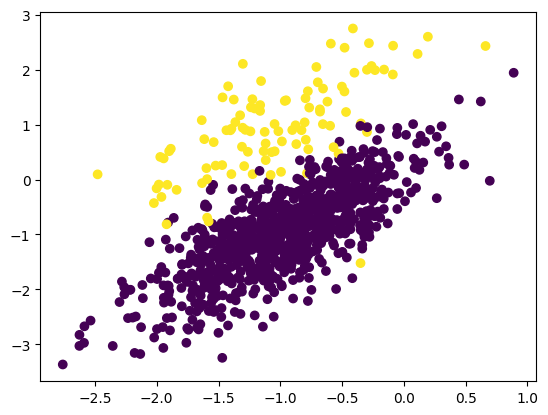

In [9]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [10]:
!pip install imblearn

     |████████████████████████████████| 258 kB 3.1 MB/s eta 0:00:01


In [11]:
from imblearn.over_sampling import SMOTE


### Transform the dataset 

In [12]:
oversample = SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [13]:
X.shape

(1800, 2)

In [17]:
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])


In [18]:
final_df = pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [19]:
final_df['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

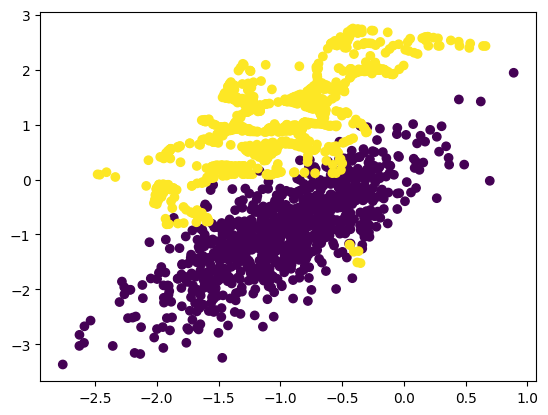

In [20]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])